In [4]:
# Importing Necessary Libraries
# Numerical libraries
import numpy as np
import pandas as pd

# Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# some stock-specific packages
!pip install yahoo_fin
!pip install requests_html
import yahoo_fin.stock_info as si

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.4/83.4 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.8/143.8 kB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 12.7 MB/s eta 0:00:00
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1257 sha256=83cdfa060f7b91fe2438e1da7178b066b6c869dec29493d80e8c896a3b55fe7d
  Stored in directory: /root/.cache/pip/wheels/25/42/45/b773edc52acb16cd2db4cf1a0b47117e2f69bb4eb300ed0e70
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6049 sha256=bbc882984a8dbf1f9c96d4ad72de60c9ffe2eae30514e260a5277bf48064f43b
  Stored in directory: /root/.cache/pip/wheels/f0/69/93/a47e9d621be168e9e33c7ce60524393c0b92ae83cf6c6e89c5
Successfully built bs4 sgmllib3k
  Attempting uninstall: urllib3
    Found exist

# Data Loading and Integration

* Each group is assigned three sectors, as presented in the link below:
https://docs.google.com/spreadsheets/d/16-7e3dNk_h02Vd3F_BtrbrQ27dbO7pIe4d-N1kRrI24/edit?usp=sharing

* (4 pts) Your group must select ten stocks per sector (thirty stocks in total). You must grab daily data for your assets using Python (e.g., check the code at https://drive.google.com/file/d/1cQxGg7hdXfqMaUyBmYTk8kH9JTTwLLJR/view?usp=sharing).
HINT: If you update the Yahoo Finance code that has been provided to you and return monthly data, this becomes quite easy to implement:
Hint: just change interval='1mo' to interval='1d'
interval: {“1d”, “1wk”, “1mo”}. Refers to the interval to sample the data: “1d”= daily, “1wk”= weekly, “1mo”=monthly.
https://algotrading101.com/learn/yahoo-finance-api-guide/
* For training, you will use daily data from January 1, 2017 to December 31, 2021 (see below for details). For evaluating the performance of the strategies, you will use daily data from January 1, 2022 to December 31, 2022. You must check the quality of your data and, if necessary, clean it (i.e., remove entries of days for which information is missing) (-2 pts otherwise).
(3 pts) Present one time-series visualization (value of the stocks over time) per sector (so you will have three visualizations of time-series, one per sector).
(3 pts) Discuss what you see in each visualization plot (e.g., volatility over time).


In [104]:
# Assigning Stocks to tickers_list to scrape
tickers_list =  ['AMZN','TSLA','HD','TM','MCD','NKE','SBUX','LOW','BABA','F','HON','UNP','UPS','GE','CAT','RTX','BA','SIEGY','DE','LMT','AAPL','MSFT','NVDA','AVGO','ADBE','CSCO','ACN','CRM','AMD','INTU']


In [106]:
# pull historical price data for each stocks to match with new score
dow_prices = {ticker : si.get_data(ticker,start_date = '12/01/2016',end_date='12/31/2021',interval='1d') for ticker in tickers_list}
dow_prices #printing it to check the historical data

{'AMZN':                   open        high         low       close    adjclose  \
 2016-12-01   37.620499   37.668499   36.901501   37.182499   37.182499   
 2016-12-02   37.169998   37.424500   36.834999   37.016998   37.016998   
 2016-12-05   37.250000   38.074501   37.099998   37.967999   37.967999   
 2016-12-06   38.199501   38.411999   37.862499   38.236000   38.236000   
 2016-12-07   38.227501   38.521000   37.791000   38.521000   38.521000   
 ...                ...         ...         ...         ...         ...   
 2021-12-23  170.427994  171.975006  170.149994  171.068497  171.068497   
 2021-12-27  171.037003  172.942993  169.215500  169.669495  169.669495   
 2021-12-28  170.182495  172.175995  169.135498  170.660995  170.660995   
 2021-12-29  170.839996  171.212006  168.600494  169.201004  169.201004   
 2021-12-30  169.699997  170.888000  168.524002  168.644501  168.644501   
 
               volume ticker  
 2016-12-01  93320000   AMZN  
 2016-12-02  71226000   AMZN

In [107]:
# let's extract just the data we need (adjclose)
# get the adjclose price for the AMAZON (one sample)
prep_data = pd.DataFrame(dow_prices['AMZN']['adjclose']).rename(columns = {"adjclose":"AMZN"})

# combine all the tickers (all the rest of the samples)
for i in tickers_list[1:]:
  prep_data[i] = pd.DataFrame(dow_prices[i]['adjclose'])
prep_data.head()

,AMZN,TSLA,HD,TM,MCD,NKE,SBUX,LOW,BABA,F,...,AAPL,MSFT,NVDA,AVGO,ADBE,CSCO,ACN,CRM,AMD,INTU
2016-12-01,37.182499,12.125333,110.151337,117.769997,100.939102,47.123226,50.816460,62.430309,89.860001,8.829710,...,25.474178,54.052624,21.597086,129.062576,99.510002,23.711905,105.625084,68.459999,8.39,107.388588
2016-12-02,37.016998,12.098000,110.491661,116.830002,100.743134,46.946480,49.687397,63.582169,90.480003,8.694742,...,25.569567,54.098267,21.796698,130.196274,99.730003,23.550863,105.292900,68.410004,8.53,107.284416
2016-12-05,37.967999,12.453333,110.329994,117.559998,101.637756,48.239685,49.939270,63.889938,90.989998,8.836814,...,25.385763,54.983944,22.641947,131.710587,101.949997,23.776314,105.678925,70.800003,8.68,108.828415
2016-12-06,38.236000,12.390000,109.530273,117.879997,101.603676,47.048805,49.887154,63.714077,90.400002,8.922057,...,25.581200,54.737404,23.014055,130.624420,101.550003,23.615282,106.298355,70.620003,9.45,108.487373
2016-12-07,38.521000,12.876667,112.695183,121.459999,102.174522,48.472275,51.033600,67.178520,91.070000,9.277234,...,25.832478,56.033924,23.428055,133.629181,103.360001,24.114475,109.135109,71.779999,9.56,110.457626


In [108]:
#Size of the data, checking rows and columns from the scraped data
x = prep_data.shape
print("Number of rows : ", x[0])
print("Number of stocks : ", x[1])

Number of rows :  1279
Number of stocks :  30


In [109]:
prep_data.isna().sum().sum() # Checking Null Values in the data

0

In [11]:
# create return features for each ticker,
# we will just use a pct_change as the return
return_data = pd.DataFrame()
for i in tickers_list:
  return_data[i] = prep_data[i].pct_change()
# drop the na records
return_data.dropna(inplace=True)
return_data

,AMZN,TSLA,HD,TM,MCD,NKE,SBUX,LOW,BABA,F,...,AAPL,MSFT,NVDA,AVGO,ADBE,CSCO,ACN,CRM,AMD,INTU
2017-01-04,0.004657,0.046085,0.008860,0.022269,-0.001170,0.020970,0.011563,0.012121,0.021558,0.046068,...,-0.001120,-0.004474,0.023331,-0.007121,0.006378,-0.005945,0.002404,0.032039,0.000000,0.002004
2017-01-05,0.030732,-0.001057,-0.011808,-0.006189,0.001841,-0.000189,0.008394,-0.010305,0.042647,-0.030372,...,0.005085,0.000000,-0.025385,-0.015756,0.016996,0.002326,-0.014991,-0.000137,-0.016623,0.006175
2017-01-06,0.019912,0.009967,-0.002763,-0.002574,0.008855,0.016020,0.011867,-0.001689,-0.005086,-0.000783,...,0.011148,0.008668,0.013367,0.013255,0.022566,0.001989,0.011392,0.013876,0.007117,0.013091
2017-01-09,0.001168,0.009912,0.005841,-0.003246,-0.002732,-0.009831,0.018730,0.001692,0.008840,-0.010188,...,0.009159,-0.003182,0.040543,0.002152,0.002493,-0.001654,-0.011178,0.002168,0.015018,-0.002995
2017-01-10,-0.001280,-0.006096,0.013328,0.000167,-0.001495,-0.005058,-0.005499,0.001970,0.021432,0.017419,...,0.001009,-0.000319,-0.007550,0.020343,-0.002855,0.006627,0.000522,0.000270,-0.004352,-0.003433
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-23,0.000184,0.057619,0.003614,0.013344,0.003812,0.001390,0.005638,0.001562,0.007215,0.005462,...,0.003644,0.004472,0.008163,0.014652,0.010000,0.012189,-0.000941,0.001345,0.015707,0.006412
2021-12-27,-0.008178,0.025248,0.017679,0.011536,0.008611,0.011529,0.016463,0.014435,-0.017445,0.027160,...,0.022975,0.023185,0.044028,0.014260,0.014150,0.018304,0.029803,0.020384,0.056247,0.026836
2021-12-28,0.005844,-0.005000,0.005271,-0.006186,-0.001342,-0.006922,0.011819,0.001261,-0.015353,-0.001923,...,-0.005767,-0.003504,-0.020133,-0.007831,-0.014402,0.001735,-0.000145,-0.011034,-0.007839,-0.004581
2021-12-29,-0.008555,-0.002095,0.011373,-0.005792,0.002277,0.014181,0.007009,0.013975,-0.023606,-0.009634,...,0.000502,0.002051,-0.010586,0.005396,-0.000123,0.006769,0.000361,-0.003562,-0.031929,-0.002693


In [12]:
return_data.shape # Shape of the data after taking the difference of the data

(1257, 30)

# Data Visualization of the Time Series

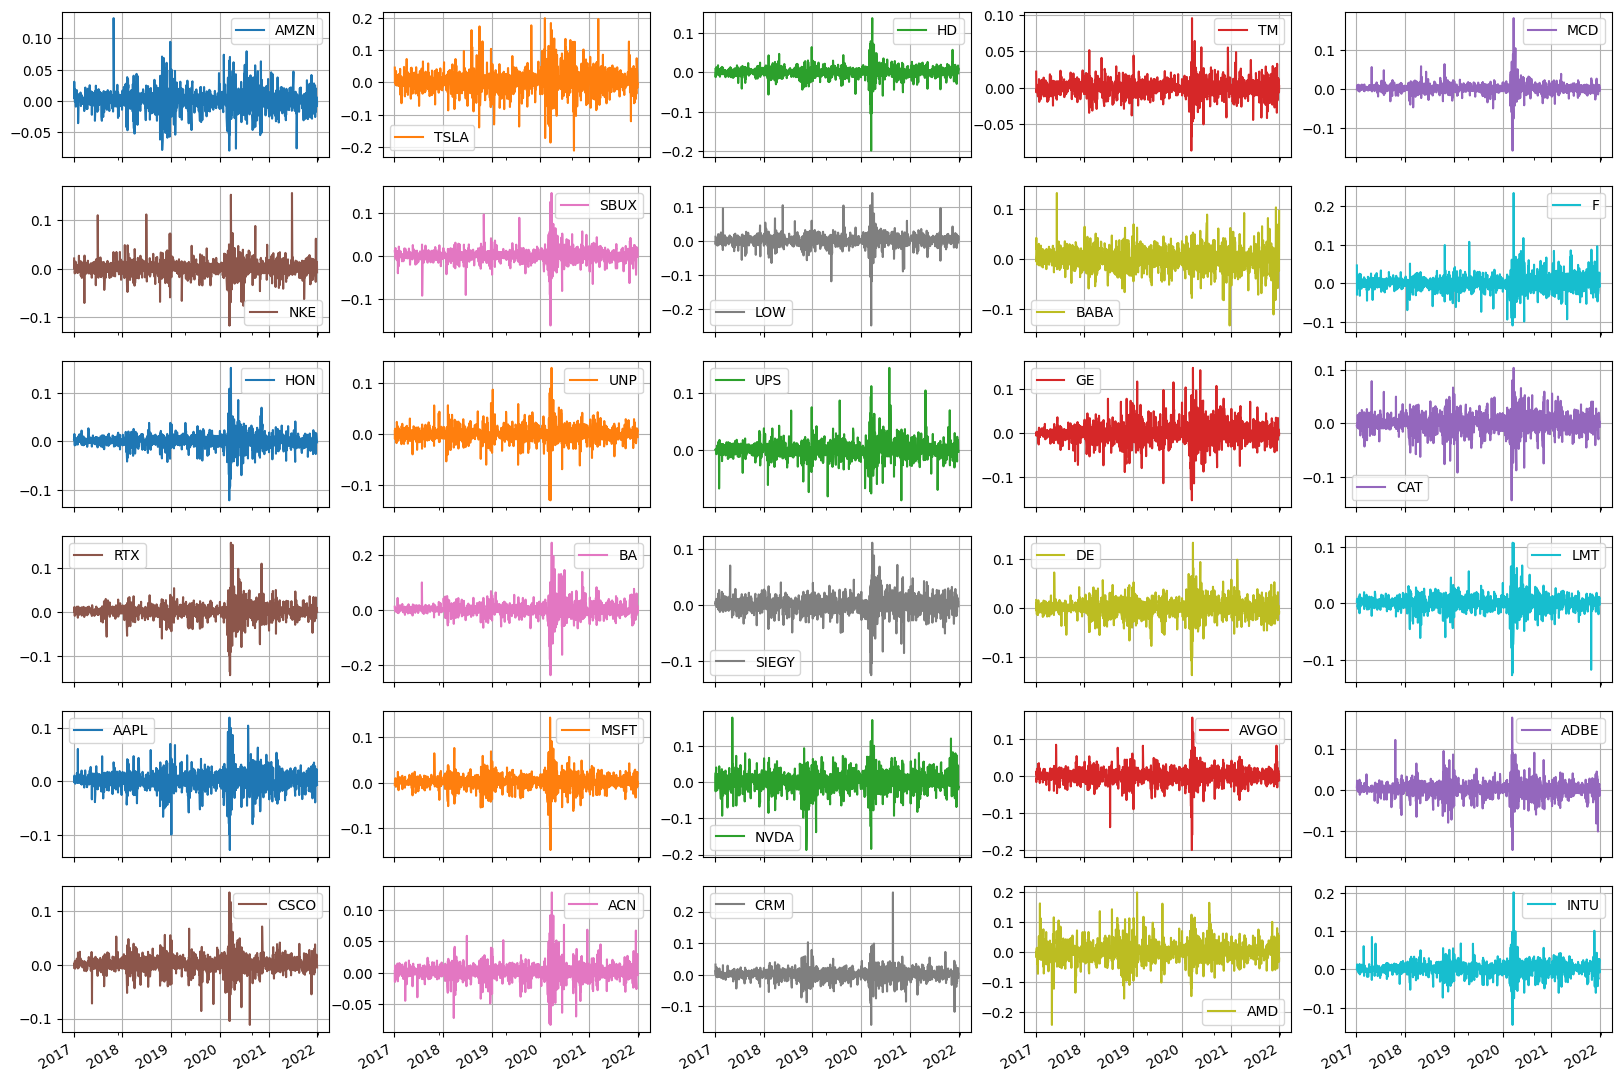

In [13]:
# Stock prices over the period of time
return_data.plot(subplots=True,
        grid=True,
        layout=(6,5),
         figsize=(20,15))
plt.show()

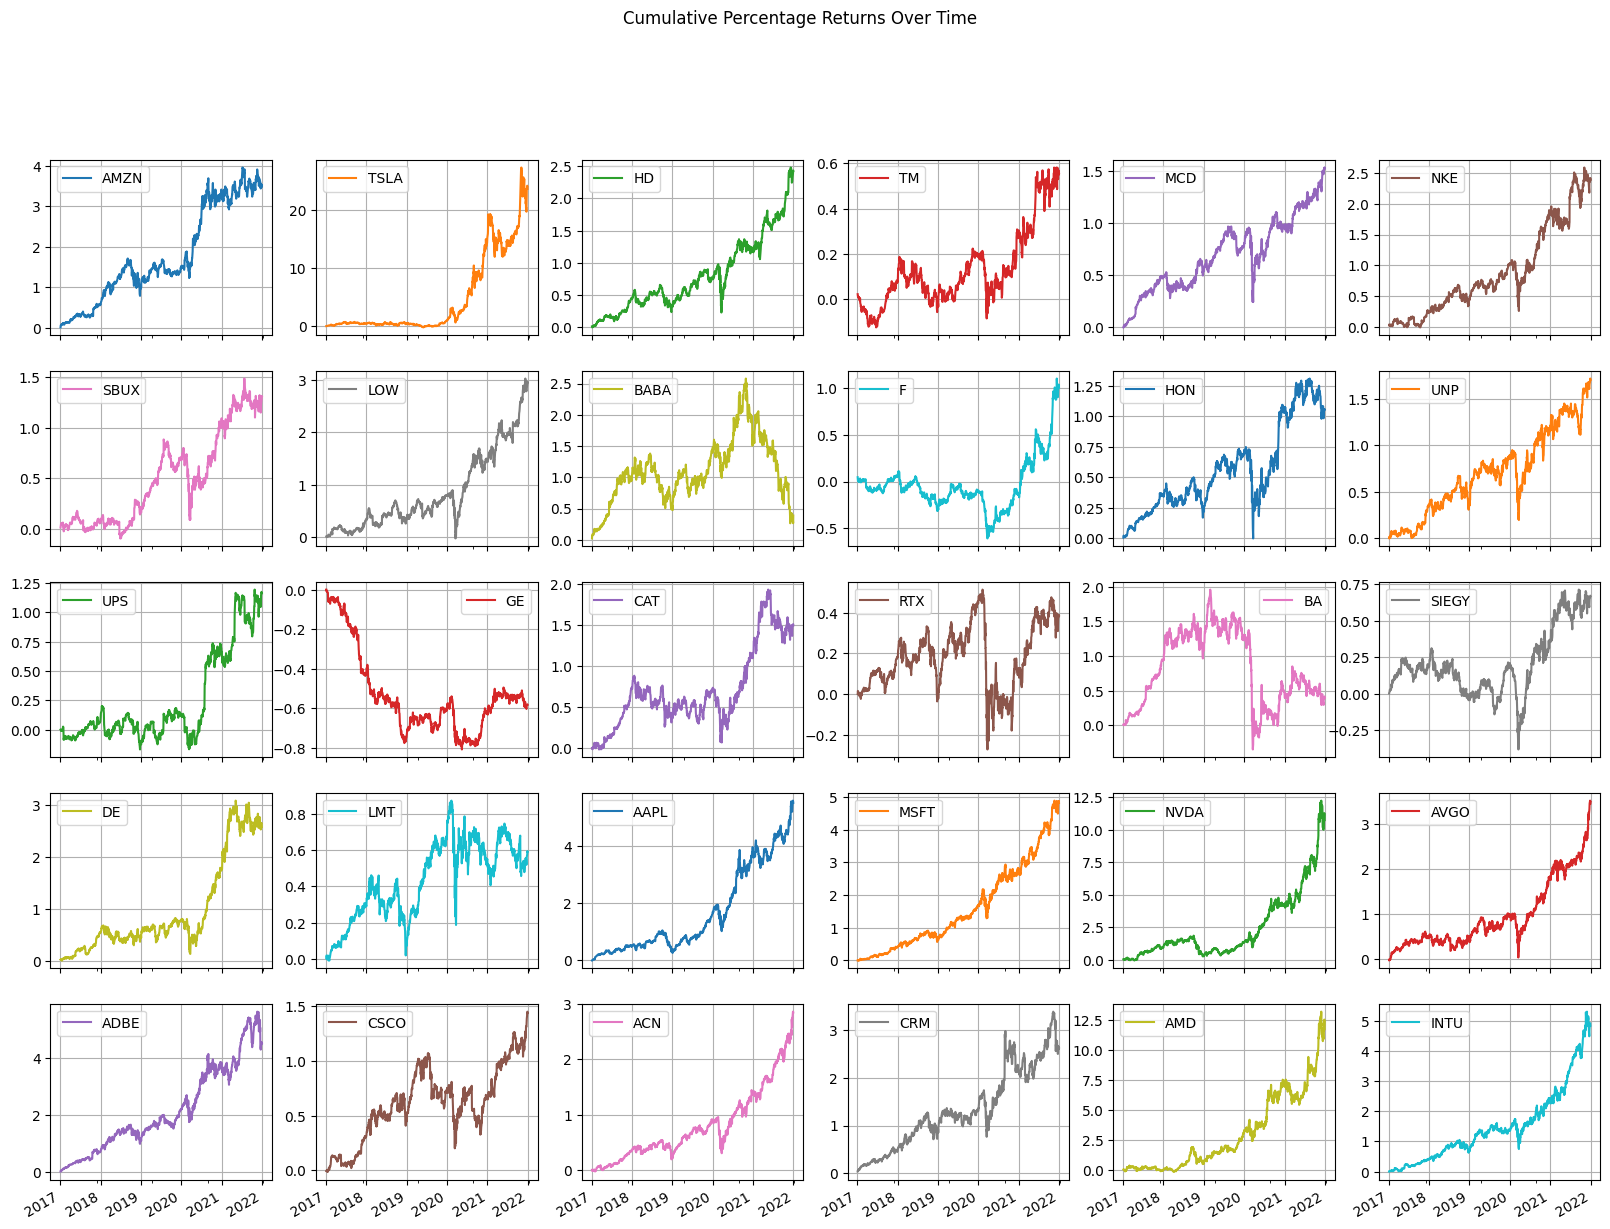

In [14]:
cumulative_returns = (1 + return_data).cumprod() - 1

# Plot the cumulative returns
cumulative_returns.plot(subplots=True,
                        grid=True,
                        layout=(5, 6),  # Adjust the layout as needed
                        figsize=(20, 15),
                        title="Cumulative Percentage Returns Over Time")

plt.show()

In [15]:
# done by Manas

# Momentum Trading for Stock Selection

* (15 pts) For each sector, you must apply the 8-21 Momentum Trading Strategy to each selected stock using daily data from the year 2021. We do not want to see 30 copies of the same code blocks, so you must use functions to keep your notebook concise (-7 pts otherwise).
* (5 pts) For each sector, you must plot the performance of the 8-21 Momentum Trading Strategy for each stock (i.e., one plot with ten curves, one per stock). More precisely, we want to see how the investment in each stock changed over time (like a traditional stock performance curve). Note that this plot differs from the ones in the Momentum Trading notebook!
* Present a conclusion for each sector and mention explicitly the top-three performing stocks of each sector; nine stocks will be mentioned in this discussion (-3 pts if this discussion is missing).



In [16]:
# should be done by Priyanka

In [128]:
prep_data.head()

,AMZN,TSLA,HD,TM,MCD,NKE,SBUX,LOW,BABA,F,...,AAPL,MSFT,NVDA,AVGO,ADBE,CSCO,ACN,CRM,AMD,INTU
2016-12-01,37.182499,12.125333,110.151337,117.769997,100.939102,47.123226,50.816460,62.430309,89.860001,8.829710,...,25.474178,54.052624,21.597086,129.062576,99.510002,23.711905,105.625084,68.459999,8.39,107.388588
2016-12-02,37.016998,12.098000,110.491661,116.830002,100.743134,46.946480,49.687397,63.582169,90.480003,8.694742,...,25.569567,54.098267,21.796698,130.196274,99.730003,23.550863,105.292900,68.410004,8.53,107.284416
2016-12-05,37.967999,12.453333,110.329994,117.559998,101.637756,48.239685,49.939270,63.889938,90.989998,8.836814,...,25.385763,54.983944,22.641947,131.710587,101.949997,23.776314,105.678925,70.800003,8.68,108.828415
2016-12-06,38.236000,12.390000,109.530273,117.879997,101.603676,47.048805,49.887154,63.714077,90.400002,8.922057,...,25.581200,54.737404,23.014055,130.624420,101.550003,23.615282,106.298355,70.620003,9.45,108.487373
2016-12-07,38.521000,12.876667,112.695183,121.459999,102.174522,48.472275,51.033600,67.178520,91.070000,9.277234,...,25.832478,56.033924,23.428055,133.629181,103.360001,24.114475,109.135109,71.779999,9.56,110.457626


# divide data into sectors

In [129]:
data_cds = prep_data.iloc[:,:10]
data_is = prep_data.iloc[:,10:20]
data_ts = prep_data.iloc[:,20:]

In [130]:
data_cds

,AMZN,TSLA,HD,TM,MCD,NKE,SBUX,LOW,BABA,F
2016-12-01,37.182499,12.125333,110.151337,117.769997,100.939102,47.123226,50.816460,62.430309,89.860001,8.829710
2016-12-02,37.016998,12.098000,110.491661,116.830002,100.743134,46.946480,49.687397,63.582169,90.480003,8.694742
2016-12-05,37.967999,12.453333,110.329994,117.559998,101.637756,48.239685,49.939270,63.889938,90.989998,8.836814
2016-12-06,38.236000,12.390000,109.530273,117.879997,101.603676,47.048805,49.887154,63.714077,90.400002,8.922057
2016-12-07,38.521000,12.876667,112.695183,121.459999,102.174522,48.472275,51.033600,67.178520,91.070000,9.277234
...,...,...,...,...,...,...,...,...,...,...
2021-12-23,171.068497,355.666656,379.369568,183.779999,255.889496,162.362106,107.505829,240.497620,118.660004,17.747190
2021-12-27,169.669495,364.646667,386.076630,185.899994,258.092865,164.233978,109.275749,243.969131,116.589996,18.229212
2021-12-28,170.660995,362.823334,388.111694,184.750000,257.746521,163.097122,110.567299,244.276886,114.800003,18.194157
2021-12-29,169.201004,362.063324,392.525726,183.679993,258.333405,165.410004,111.342239,247.690704,112.089996,18.018875


# Function to create 8-day and 21-day moving averages

In [142]:
def create_MomentumTrading_columns(input_df):

  new_dataframe_ma = pd.DataFrame()

  for column in input_df.columns:
    new_column_name_8 = f"{column}_8_day"
    new_dataframe_ma[new_column_name_8] = input_df[column].rolling(8).mean().shift()
    new_column_name_21 = f"{column}_21_day"
    new_dataframe_ma[new_column_name_21] = input_df[column].rolling(21).mean().shift()
    new_column_name_log = f"{column}_log"
    new_dataframe_ma[new_column_name_log] = np.log(input_df[column])
  new_dataframe_ma = pd.concat([input_df, new_dataframe_ma], axis =1)

  new_dataframe_ma.dropna(inplace=True)

  new_dataframe_RI = pd.DataFrame()

  for column in input_df.columns:
    existing_column_name_log = f"{column}_log"
    new_column_name_return = f"{column}_return"
    new_dataframe_RI[new_column_name_return] = new_dataframe_ma[existing_column_name_log].diff()

    existing_column_name_8 = f"{column}_8_day"
    existing_column_name_21 = f"{column}_21_day"
    new_column_name_invested = f"{column}_invested"
    new_dataframe_RI[new_column_name_invested] = np.where(new_dataframe_ma[existing_column_name_8] > new_dataframe_ma[existing_column_name_21], 1,0)

  new_dataframe_RI.fillna(0, inplace=True)

  new_dataframe_RI = pd.concat([new_dataframe_ma, new_dataframe_RI], axis =1)


  new_dataframe_final = pd.DataFrame()

  for column in input_df.columns:
    existing_column_name_return = f"{column}_return"
    existing_column_name_invested = f"{column}_invested"

    new_column_name_systemReturn = f"{column}_system_return"
    new_dataframe_final[new_column_name_systemReturn] = new_dataframe_RI[existing_column_name_return] * new_dataframe_RI[existing_column_name_invested]

  new_dataframe_final = pd.concat([new_dataframe_RI, new_dataframe_final], axis =1)

  return new_dataframe_final

In [143]:
data_cds_final = create_MomentumTrading_columns(data_cds)
data_is_final = create_MomentumTrading_columns(data_is)
data_ts_final = create_MomentumTrading_columns(data_ts)

In [144]:
data_cds_final.head(n=20)

,AMZN,TSLA,HD,TM,MCD,NKE,SBUX,LOW,BABA,F,...,AMZN_system_return,TSLA_system_return,HD_system_return,TM_system_return,MCD_system_return,NKE_system_return,SBUX_system_return,LOW_system_return,BABA_system_return,F_system_return
2017-01-03,37.683498,14.466000,114.269127,118.550003,101.918922,48.360638,48.071976,62.386349,88.599998,8.943367,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
2017-01-04,37.859001,15.132667,115.281586,121.190002,101.799637,49.374737,48.627823,63.142525,90.510002,9.355373,...,0.000000,0.045055,0.008821,0.000000,-0.001171,0.020753,0.000000,0.000000,0.000000,0.000000e+00
2017-01-05,39.022499,15.116667,113.920303,120.440002,101.987083,49.365433,49.036015,62.491840,94.370003,9.071232,...,0.000000,-0.001058,-0.011879,-0.000000,0.001840,-0.000188,0.000000,-0.000000,0.000000,-0.000000e+00
2017-01-06,39.799500,15.267333,113.605537,120.129997,102.890236,50.156254,49.617924,62.386349,93.889999,9.064126,...,0.000000,0.009918,-0.002767,-0.000000,0.000000,0.015893,0.000000,-0.000000,-0.000000,-0.000000e+00
2017-01-09,39.846001,15.418667,114.269127,119.739998,102.609055,49.663155,50.547218,62.491840,94.720001,8.971781,...,0.001168,0.009863,0.000000,-0.000000,-0.000000,-0.009880,0.000000,0.000000,0.000000,-0.000000e+00
2017-01-10,39.794998,15.324667,115.792046,119.760002,102.455711,49.411942,50.269306,62.614956,96.750000,9.128059,...,-0.001281,-0.006115,0.000000,0.000000,-0.000000,-0.005071,-0.000000,0.000000,0.021205,0.000000e+00
2017-01-11,39.951000,15.315333,115.451744,119.910004,102.992477,49.021183,50.460377,62.658939,96.940002,9.000195,...,0.003912,-0.000609,-0.000000,0.000000,0.000000,-0.007940,0.000000,0.000000,0.001962,-1.410692e-02
2017-01-12,40.681999,15.306000,114.915749,119.639999,104.031929,48.751381,50.399570,62.940308,95.900002,8.943367,...,0.018132,-0.000610,-0.000000,-0.000000,0.000000,-0.005519,-0.000000,0.000000,-0.010786,-6.334053e-03
2017-01-13,40.856998,15.850000,114.890198,119.809998,103.520744,49.235176,50.243248,63.441513,96.269997,8.971781,...,0.004292,0.034925,-0.000000,0.000000,-0.000000,0.009875,-0.000000,0.000000,0.003851,3.172042e-03
2017-01-17,40.486000,15.705333,115.647392,118.410004,104.585747,49.914345,50.373528,63.643715,96.120003,8.957574,...,-0.009122,-0.009169,0.000000,-0.011754,0.000000,0.013700,0.002590,0.000000,-0.001559,-1.584763e-03


In [112]:
# def create_movingAverage_columns(input_df):

#   new_dataframe = pd.DataFrame()

#   for column in input_df.columns:
#     new_column_name_8 = f"{column}_8_day"
#     new_dataframe[new_column_name_8] = input_df[column].rolling(8).mean().shift()
#     new_column_name_21 = f"{column}_21_day"
#     new_dataframe[new_column_name_21] = input_df[column].rolling(21).mean().shift()
#     new_column_name_log = f"{column}_log"
#     new_dataframe[new_column_name_log] = np.log(input_df[column])
#   new_dataframe = pd.concat([input_df, new_dataframe], axis =1)

#   return new_dataframe

In [113]:
# data_cds_ma = create_movingAverage_columns(data_cds)
# data_is_ma = create_movingAverage_columns(data_is)
# data_ts_ma = create_movingAverage_columns(data_ts)

In [116]:
# data_cds_ma.head(n=10)

,AMZN,TSLA,HD,TM,MCD,NKE,SBUX,LOW,BABA,F,...,SBUX_log,LOW_8_day,LOW_21_day,LOW_log,BABA_8_day,BABA_21_day,BABA_log,F_8_day,F_21_day,F_log
2017-01-03,37.683498,14.466000,114.269127,118.550003,101.918922,48.360638,48.071976,62.386349,88.599998,8.943367,...,3.872699,63.752545,64.358896,4.133346,87.841250,89.685238,4.484132,8.815503,8.936940,2.190912
2017-01-04,37.859001,15.132667,115.281586,121.190002,101.799637,49.374737,48.627823,63.142525,90.510002,9.355373,...,3.884196,63.387639,64.356803,4.145394,87.686251,89.625238,4.505460,8.798632,8.942352,2.235951
2017-01-05,39.022499,15.116667,113.920303,120.440002,101.987083,49.365433,49.036015,62.491840,94.370003,9.071232,...,3.892555,63.126048,64.335867,4.135036,87.843751,89.626667,4.547223,8.845693,8.973811,2.205108
2017-01-06,39.799500,15.267333,113.605537,120.129997,102.890236,50.156254,49.617924,62.386349,93.889999,9.064126,...,3.904352,62.912814,64.269291,4.133346,88.790001,89.787619,4.542124,8.878547,8.984974,2.204324
2017-01-09,39.846001,15.418667,114.269127,119.739998,102.609055,49.663155,50.547218,62.491840,94.720001,8.971781,...,3.922908,62.764434,64.206066,4.135036,89.677501,89.953810,4.550925,8.905185,8.991739,2.194084
2017-01-10,39.794998,15.324667,115.792046,119.760002,102.455711,49.411942,50.269306,62.614956,96.750000,9.128059,...,3.917395,62.636932,63.982891,4.137004,90.575001,90.127619,4.572130,8.926496,8.977193,2.211353
2017-01-11,39.951000,15.315333,115.451744,119.910004,102.992477,49.021183,50.460377,62.658939,96.940002,9.000195,...,3.921188,62.597367,63.814150,4.137706,91.747500,90.339048,4.574092,8.979772,8.971105,2.197246
2017-01-12,40.681999,15.306000,114.915749,119.639999,104.031929,48.751381,50.399570,62.940308,95.900002,8.943367,...,3.919983,62.588577,63.670532,4.142187,92.948750,90.513334,4.563306,9.018842,8.954191,2.190912
2017-01-13,40.856998,15.850000,114.890198,119.809998,103.520744,49.235176,50.243248,63.441513,96.269997,8.971781,...,3.916876,62.639138,63.547849,4.150118,93.960001,90.676667,4.567157,9.059687,8.946411,2.194084
2017-01-17,40.486000,15.705333,115.647392,118.410004,104.585747,49.914345,50.373528,63.643715,96.120003,8.957574,...,3.919466,62.771034,63.443172,4.153301,94.918751,90.872381,4.565597,9.063239,8.941675,2.192499


In [115]:
# data_cds_ma.dropna(inplace=True)
# data_cds_ma.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2017-01-03 to 2021-12-30
Data columns (total 40 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AMZN         1258 non-null   float64
 1   TSLA         1258 non-null   float64
 2   HD           1258 non-null   float64
 3   TM           1258 non-null   float64
 4   MCD          1258 non-null   float64
 5   NKE          1258 non-null   float64
 6   SBUX         1258 non-null   float64
 7   LOW          1258 non-null   float64
 8   BABA         1258 non-null   float64
 9   F            1258 non-null   float64
 10  AMZN_8_day   1258 non-null   float64
 11  AMZN_21_day  1258 non-null   float64
 12  AMZN_log     1258 non-null   float64
 13  TSLA_8_day   1258 non-null   float64
 14  TSLA_21_day  1258 non-null   float64
 15  TSLA_log     1258 non-null   float64
 16  HD_8_day     1258 non-null   float64
 17  HD_21_day    1258 non-null   float64
 18  HD_log       1258 non-null   f

# Function to create  'return' ; and 'Invested'

In [117]:
# def create_return_invested_columns(input_df, new_input_df_ma):

#   new_dataframe = pd.DataFrame()

#   for column in input_df.columns:
#     existing_column_name_log = f"{column}_log"
#     new_column_name_return = f"{column}_return"
#     new_dataframe[new_column_name_return] = new_input_df_ma[existing_column_name_log].diff()

#     existing_column_name_8 = f"{column}_8_day"
#     existing_column_name_21 = f"{column}_21_day"
#     new_column_name_invested = f"{column}_invested"
#     new_dataframe[new_column_name_invested] = np.where(new_input_df_ma[existing_column_name_8] > new_input_df_ma[existing_column_name_21], 1,0)

#   new_dataframe = pd.concat([new_input_df_ma, new_dataframe], axis =1)

#   return new_dataframe

In [118]:
# data_cds_RI = create_return_invested_columns(data_cds, data_cds_ma)
# data_is_RI = create_return_invested_columns(data_is, data_is_ma)
# data_ts_RI = create_return_invested_columns(data_ts, data_ts_ma)

# Function to create system return

In [119]:
# def create_return_invested_columns(input_df, new_input_df_full):

#   new_dataframe = pd.DataFrame()

#   for column in input_df.columns:
#     existing_column_name_return = f"{column}_return"
#     existing_column_name_invested = f"{column}_invested"

#     new_column_name_systemReturn = f"{column}_system_return"
#     new_dataframe[new_column_name_systemReturn] = new_input_df_full[existing_column_name_return] * new_input_df_full[existing_column_name_invested]

#   new_dataframe = pd.concat([new_input_df_full, new_dataframe], axis =1)

#   return new_dataframe

In [120]:
# data_cds_final = create_return_invested_columns(data_cds, data_cds_RI)
# data_is_final = create_return_invested_columns(data_is, data_is_RI)
# data_ts_final = create_return_invested_columns(data_ts, data_ts_RI)

In [121]:
# data_cds_final.dropna(inplace=True)
# data_is_final.dropna(inplace=True)
# data_ts_final.dropna(inplace=True)

In [145]:
for column in data_cds:
  name = f"{column}"
  column_name = f"{column}_system_return"
  print("The return value for stock ",name , " is : ", np.exp(np.sum(data_cds_final[column_name])) - 1)

The return value for stock  AMZN  is :  1.6338406193821524
The return value for stock  TSLA  is :  11.146642491123746
The return value for stock  HD  is :  1.597965803165748
The return value for stock  TM  is :  -0.040512557280916295
The return value for stock  MCD  is :  0.5106194142358347
The return value for stock  NKE  is :  0.6985306129063995
The return value for stock  SBUX  is :  0.637761214722544
The return value for stock  LOW  is :  2.144617496257091
The return value for stock  BABA  is :  0.6096827695814198
The return value for stock  F  is :  1.6179628063923004


In [123]:
for column in data_is:
  name = f"{column}"
  column_name = f"{column}_system_return"
  print("The return value for stock ",name)
  print(np.exp(np.sum(data_is_final[column_name])) - 1)

The return value for stock  HON
0.42872120301183414
The return value for stock  UNP
0.45949285680023055
The return value for stock  UPS
0.6426710825745607
The return value for stock  GE
-0.14948288445578095
The return value for stock  CAT
0.893219447315899
The return value for stock  RTX
-0.0985448388442528
The return value for stock  BA
0.48731691768708396
The return value for stock  SIEGY
0.24633074629587037
The return value for stock  DE
1.1899803826366648
The return value for stock  LMT
0.5874312197442619


In [124]:
for column in data_ts:
  name = f"{column}"
  column_name = f"{column}_system_return"
  print("The return value for stock ",name)
  print(np.exp(np.sum(data_ts_final[column_name])) - 1)

The return value for stock  AAPL
4.098268391728282
The return value for stock  MSFT
1.23461997181544
The return value for stock  NVDA
4.21660498144603
The return value for stock  AVGO
1.5481857941751045
The return value for stock  ADBE
2.6394689930984354
The return value for stock  CSCO
0.17519079627701584
The return value for stock  ACN
1.7854202242819799
The return value for stock  CRM
0.4589229419403362
The return value for stock  AMD
3.0759163920170804
The return value for stock  INTU
1.1683481561283062


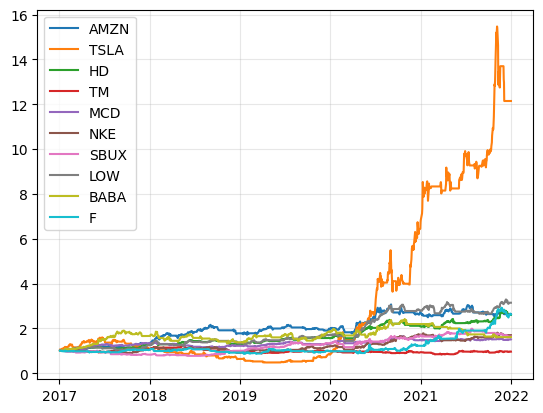

In [125]:
for column in data_cds:
  name = f"{column}"
  column_name = f"{column}_system_return"
  plt.plot(np.exp(data_cds_final[column_name]).cumprod(), label = name)

plt.legend(loc=2)
plt.grid(True, alpha=.3)
plt.show()


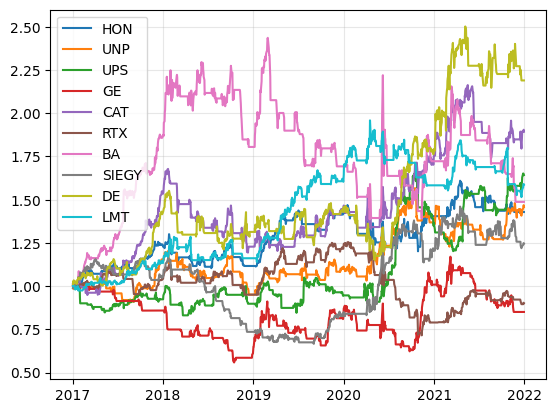

In [126]:
for column in data_is:
  name = f"{column}"
  column_name = f"{column}_system_return"
  plt.plot(np.exp(data_is_final[column_name]).cumprod(), label = name)

plt.legend(loc=2)
plt.grid(True, alpha=.3)
plt.show()


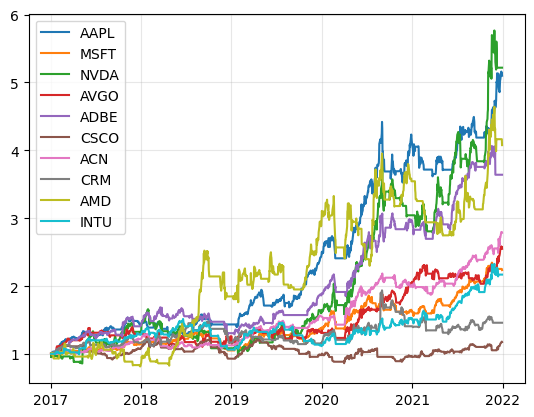

In [127]:
for column in data_ts:
  name = f"{column}"
  column_name = f"{column}_system_return"
  plt.plot(np.exp(data_ts_final[column_name]).cumprod(), label = name)

plt.legend(loc=2)
plt.grid(True, alpha=.3)
plt.show()


# Optimization Model
* (10 pts) Run the portfolio allocation model for different and adequate risk levels using the nine stocks selected in the previous step. Namely, we want to see when the risk levels are too small and when the risk levels are too large. (Warning: the risk levels used in class may be too small or too big for your assets - you will need to test different ranges to find an adequate one).
You should consider at least 100 risk levels (-3 pts)
At least one risk level tested by your code must be discarded for being too small and leading to an infeasible problem (-3 pts).
You should not set any lower bound on the expected returns (-5 pts if you add such a constraint to your model - be careful with copy and paste!).
You should run the optimization model once per risk level only, i.e., your notebook should only have the code block that removes infeasible solutions  (-3 pts if the optimization model is unnecessarily executed for the same risk level more than once, e.g., without removing infeasible solutions - be careful with copy and paste!)
You should use daily data from January 1, 2017, to December 31, 2021, to train your model (-3 points if an incorrect period is used).
*(5 pts) Show how your allocation into different stocks will vary for different risk levels.
The plot must show the efficient frontier reaching the plateau (-2 pts)
The plateau should not be more than 25% of the plot (-2 pts)
The plot should not contain infeasible allocations (-2 pts)
The plot must have a legend (-2 pts)
The plot must show the results of at least 80% of the risk levels (-2 pts)
* (5 pts) Show the shape of the efficient frontier for different risk levels.
The plot must show the efficient frontier reaching the plateau (-2 pts)
The plateau should not be more than 25% of the plot (-2 pts)
The plot should not contain infeasible allocations (-2 pts)
The plot must have a legend (-2 pts)
The plot must show the results of at least 80% of the risk levels (-2 pts)
Select one of the portfolio allocations returned by the optimization model containing exactly three stocks (-3 points if fewer or more assets are used). The set of stocks and the allocation must be extracted from the MPT model (-3 points if another allocation is used; minor roundings are acceptable). This portfolio allocation will be used in the analysis.


In [ ]:
# Atharva

# Analysis

Let’s see how you would have applied the following investment strategies in 2022. You can suppose you have $100,000 to invest. You should use the portfolio allocation selected by the MPT model (-3 points if a different allocation is used). Fractional shares are okay, i.e., if the stock costs $100, but your allocation restricts the purchase to $50, you will buy 0.5 shares of this stock (this is not a simplification; this happens in practice!). Your solution will not be evaluated based on the returns of your portfolio, i.e., if you lose money, it’s OK!

*(5 pts) Buy-and-Hold strategy for the MPT portfolio: Create a table that shows the amount of money invested in each stock of your portfolio on the first day of each month (i.e., how much money is currently invested in each stock) as well as the aggregate value of the entire portfolio from Jan 1, 2022 (when you would have done your allocation), February 1, 2022 …, through December 1, 2022.
(10 pts) 8-21 Momentum trading strategy on the S&P 500 index (^GSPC): In this investment, you should apply the 8-21 Momentum Trading strategy to the S&P 500 index (^GSPC), as it was a stock. Create a table that shows the value of each position in your portfolio on the first day of each month (i.e., how much money is currently allocated to each stock) as well as the aggregate value of the entire portfolio from Jan 1, 2022 (when you would have done your allocation), February 1, 2022 …, through December 1, 2022. When computing the moving averages, you must consider the last days of 2021; therefore, in principle, your model should be able to buy the stocks on Jan 1, 2022 (deduction of 3 points if the last days of 2021 are not used).  
* (5 pts) Buy-and-Hold strategy for the S&P 500 index (^GSPC): Create a table that shows the amount of money invested in ^GSPC on the first day of each month (i.e., how much money is currently invested in each stock) as well as the aggregate value of the entire portfolio from Jan 1, 2022 (when you would have done your allocation), February 1, 2022 …, through December 1, 2022 (when we imagine you sold your stocks).
* (5 pts) Show the performance of each of the three strategies above in a single plot. Using the plot, compare and analyze the results obtained by the three strategies.  
Your plot must have a legend (-2 pts)
Your plot must have labels (-2 pts)


In [ ]:
# Harit and Sai-Srinivas

# Conclusion

(5 pts) Provide some closing thoughts and insights (five to ten bullets) on what you have learned from your Models and the Analysis. We will deduct points if the conclusion has only obvious comments (e.g., “We used MPT to compute a portfolio allocation” is not an insight).
List each group member’s contribution to the project and effort, i.e., what each person did (-2 pts if absent).


In [ ]:
# Anuja